# Візуальний аналіз даних (VDA - visual data analysis) з використанням бібліотек Pandas, Matplotlib, Seaborn  
 1. Імпорт бібліотек для візуалізації даних  
 2. Візуалізація в Pandas    
 3. Бібліотека Matplotlib (на самостійне опрацювання)  
 4. Бібліотека Seaborn  

Візуальний аналіз даних – це процес, у якому дослідження даних відбувається за допомогою наочного відображення інформації. Мета візуального аналізу - відповідь на важливі питання з використанням даних та фактів. Візуалізація даних дає нам чітке уявлення про те, що означає інформація, надаючи їй візуальний контекст за допомогою карт або графіків. Це робить дані більш природними для розуміння людським розумом і, отже, полегшує визначення тенденцій, закономірностей і викидів у великих наборах даних.

## 1. Імпортуємо всі необхідні бібліотеки, задамо бажані парметри та зчитаємо файл з початковими даними  

#### 1.1 імпортуємо необхідні бібліотеки

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### 1.2 Встановлюємо бажані початкові параметри (даний пункт не є обов'язковим для виконання)

In [ ]:
# графіки вбудовуються в блокнот 
%matplotlib inline

In [ ]:
# розмір графіків за замовчуванням
plt.rcParams['figure.figsize'] = (4, 4)

In [ ]:
# відключити попередження Anaconda
import warnings
warnings.simplefilter('ignore')

In [ ]:
# встановимо, що в числах типу float виводити 2 знаки після роздільника
pd.options.display.float_format = '{:.2f}'.format

#### 1.3 Зчитуємо в датафрейм df файл з початковими даними

In [ ]:
df = pd.read_csv('Scores.csv')
df.head()

<span style="color:red">_Датасет містить інформацію щодо оцінкок студентів та їх демографічні, соціальні та шкільні характеристики:_</span>  
-<span style="color:red">_gender - стать_</span>  
-<span style="color:red">_race/ethnicity - етнічна приналежність_</span>   
-<span style="color:red">_parental level of education - рівень освіти батьків_</span>   
-<span style="color:red">_lunch - ланч_</span>   
-<span style="color:red">_test preparation course - проходження курсу для підготовки до тесту_</span>  
-<span style="color:red">_math score, reading score, writing score, average - бали з математики, читання, письма та середній бал_</span>

In [ ]:
# відобразимо коротку інформацію про датафрейм
df.info()

## 2. Візуалізація в Pandas  
### 2.1 Гістограма  
Гістограма представляє розподіл даних шляхом формування "кишень" уздовж діапазону даних, а потім зображення стовпчиків, висота яких пропорційна кількості спостережень, які потрапляють у кожну "кишеню".  
Гістограми особливо корисні для розуміння форми розподілу даних. Гістограма графічно показує, як часто зустрічається кожне значення в наборі даних. Гістограми дозволяють легко побачити, які значення є найбільш поширеними, а які – найменш поширеними. На гістограмі тип вимірюваних даних відображається на горизонтальній осі, а на вертикальній осі відображається кількість спостережень у кожному контейнері. Вищі смужки вказують на те, де дані є відносно більш поширеними.  

### для побудови гісторгам використовується метод .hist()  

In [ ]:
# гістограма для 1-ї величини
df[['math score']].hist();

Наприклад, на наведеній нижче гістограмі пік даних припадає приблизно на 60-70 балів. Переважно розкид даних становить приблизно від 20 балів до 100 балів. Лише декілька студентів отримали дуже низькі бали (наприклад, менше 20 балів).

In [ ]:
# гістограма для кількох величин
# додатковий аргумент figsize = (n, m) визначає розмір графіка
df[['math score', 'reading score']].hist(figsize = (8, 4));

In [ ]:
# гістограма для всіх кількісних величин в датафреймі
df.hist( figsize=(8, 8));

### 2.2 Коробчаста діаграма  
Вона відображає розподіл даних на основі п'яти числових характеристик ("мінімум", перший квартиль (Q1), медіана, третій квартиль (Q3), і "максимум"). Показує можливі відхилення і їх значення. Ця діаграма також може сказати, чи симетричні Ваші дані, наскільки щільно вони згруповані, чи перекошені дані, і якщо так, то яким чином.
### для побудови коробчастої діаграми використовується метод .boxplot()  

<img align="center" src="https://miro.medium.com/max/18000/1*2c21SkzJMf3frPXPAR_gZA.png"  width=75% />

In [ ]:
df[['math score']].boxplot(figsize = (3, 3));

In [ ]:
df.boxplot(figsize = (6, 3));

### 2.3 Графік розподілу для категоріальних величин
- 1. застосовуємо метод **.value_counts()**  для підрахунку частоти унікальних значень  
- 2. будуємо графік роподілу за допомогою методу **.plot.bar()**

In [ ]:
# як працює метод .value_counts()
df['test preparation course'].value_counts()

In [ ]:
# Графік розподілу для категоріальних величин
#1. застосовуємо метод .value_counts()
#2. будуємо графік роподілу за допомогою методу .plot.bar()
df['test preparation course'].value_counts().plot.bar();

### 2.4 Візуалізація взаємозв'язків між величинами. Метод .scatter_matrix()  
Цей метод будує діаграми розсіювання між парами кількісних величин та відображає попарні залежності між ознаками (по діагоналі буде гістограма розподілу кожної ознаки).  

In [ ]:
# для двох величин
pd.plotting.scatter_matrix(df[['math score', 'average']], figsize=(6, 6));

In [ ]:
# для всіх кількісних величин в датафреймі
pd.plotting.scatter_matrix(df, figsize=(8, 8));

<span style="color:red">Двома найкращими бібліотеками для візуалізації в Python є **Matplotlib** і **Seaborn.**  </span>
- Бібліотека Seaborn в основному базується на Matplotlib.  
- Обидва популярні інструменти візуалізації, які використовуються в Python, мають відмінності у варіантах використання, масштабованості та багатьох інших речах. Виходячи з цих відмінностей, слід вибрати найкращий інструмент візуалізації для конкретної роботи.  
- Якщо необхідно провести грунтовний візуальний аналіз, то Seaborn — гарний вибір, оскільки він має багато вбудованих речей, придатних для статистичних завдань.  
- Seaborn містить більш адекватні налаштування  оформлення графіків за замовчанням в порівнянні з Matplotlib. Також у бібліотеці є достатьно складних типів візуалізації, які в Matplotlib потребують написання багатьох рядків коду.
- Тому коротке ознайомлення із бібліотекою Mathplotlib виноситься на самостійне опрацювання, ми зосередимо увагу на вивчені бібліотеки Seaborne.

# 3. Візуалізація в Matplotlib (на самостійне опрацювання)  
 Розглянемо деякі параметри plt.pyplot  
plt.figure() - створює контейнер, в якому знаходяться полотна на яких можна відображати графіки    
plt.xlabel(), plt.ylabel() - для підписання осей графіка  
plt.title() - для встановлення назви полотна  
plt.legend() - для додавання легенди  
plt.grid() - для додавання сітки  
plt.xticks() - налаштування підписів горизонтальної осі

# 4. Seaborn  
Seaborn містить більш адекватні налаштування  оформлення графіків за замовчанням в порівнянні з Matplotlib. Також у бібліотеці є достатьно складних типів візуалізації, які в Matplotlib потребують написання багатьох рядків коду.  

### 4.1 Загальні налаштування графіків в Seaborn  
- sns.set_style()  
основні стилі: "white", "dark", "whitegrid", "darkgrid", "ticks"  
Встановлення параметрів, які визначають загальний стиль графіків (колір фону, сітка і т.д.).

In [ ]:
# ПРИКЛАД: Основні стилі графіків Seaborn
style = ["white", "dark", "whitegrid", "darkgrid", "ticks"]
for i in style:
    sns.set_style(i)
    sns.displot(df[['average']], height=3, aspect=1).set(title='Style: ' + i)

- sns.set_palette()  
Визначає набір кольорів для графіків  
Розширений перелік наборів кольорів можна переглянути:  
[Color Guide to Seaborn Palettes](https://medium.com/@morganjonesartist/color-guide-to-seaborn-palettes-da849406d44f)  

  
- sns.set_context()  
основні стилі (в порядку зростання): "paper", "notebook", "talk", "poster"  
Визначає параметри, які керують масштабуванням елементів графіка (розмір міток, ліній і т.д.)

In [ ]:
# ПРИКЛАД: Основні стилі елементів графіків Seaborn
style = ["paper", "notebook", "talk", "poster"]
for i in style:
    sns.set_context(i)
    sns.displot(df[['average']], height=3, aspect=1).set(title='Style: ' + i)

In [ ]:
sns.set_style('whitegrid')
sns.set_palette('gist_rainbow_r')
sns.set_context("paper")

### 4.2 Візуалізація кількісних величин  
- **displot** показує гістограму і графік щільності розподілу величини  

**sns.displot(data=назва датафрейму, x=назва стовпчика, kind='hist' або 'kde')**  
kind='hist' - гістограма (за замовчуванням)  
kind='kde' - графік щільності розподілу величини  
_Додаткові (необов'язкові) параметри:_  
bins - кількість "кишень" гістограми  
hue - дозволяє отримати різні кольори для кожного значення заданої категоріальної змінної  
col, row - дозволяє отримати різні графіки для кожного значення заданої категоріальної змінної  
height - висота графіка  
aspect - співвідношення сторін, так що співвідношення * висота дає ширину

In [ ]:
sns.displot(data = df, x = 'math score', kde=True);

In [ ]:
sns.displot(data = df, x = 'math score', bins= 50, col='test preparation course', hue='gender',
           height=4.5, aspect=0.8);

### 4.3 Візуалізація взаємозв'язків між кількісними величинами  
- **sns.relplot** показує зв'язок між двома величинами (діаграма розсіювання та лінія)  

**sns.relplot(data=назва датафрейму, x=назва стовпчика_1, у=назва стовпчика_2, kind='scatter' або 'line')**  

kind='scatter' - діаграма розсіювання  
kind='line' - лінія  
_Додаткові (необов'язкові) параметри:_  
hue - дозволяє отримати різні кольори для кожного значення заданої категоріальної змінної  
col, row - дозволяє отримати різні графіки для кожного значення заданої категоріальної змінної  
height - висота графіка  
aspect - співвідношення сторін, так що співвідношення * висота дає ширину

In [ ]:
sns.relplot(data = df, x='math score', y='average');

In [ ]:
sns.relplot(data = df, x='math score', y='average', col='lunch', row='test preparation course', height=3, aspect=1.5);

### 4.4 Візуалізація категоріальних величин та візуалізація зв'язків між кількісними та категоріальними величинами  
**sns.catplot(data=назва датафрейму, x=назва стовпчика_1, у=назва стовпчика_2, kind='...')**  
**1. поділ кількісної величини на категорії:**  
- kind="box" - boxplot  
- kind="violin" - violinplot (боксплот + графік щільності розподілу)  
- kind="boxen" - boxenplot (letter-value plots) показує розподіл інакше, ніж боксплот, та є кращим для більших наборів даних. Графіки boxenplots починаються з медіани (Q2, 50-й процентиль) як центральної лінії. Кожен наступний вихідний рівень містить половину даних, що залишилися. Отже, перші два розділи від центральної лінії містять 50% даних. Після цього наступні два розділи містять 25% даних. Це продовжується, поки ми не досягнемо рівня викиду. Кожен рівень затінений світліше.  
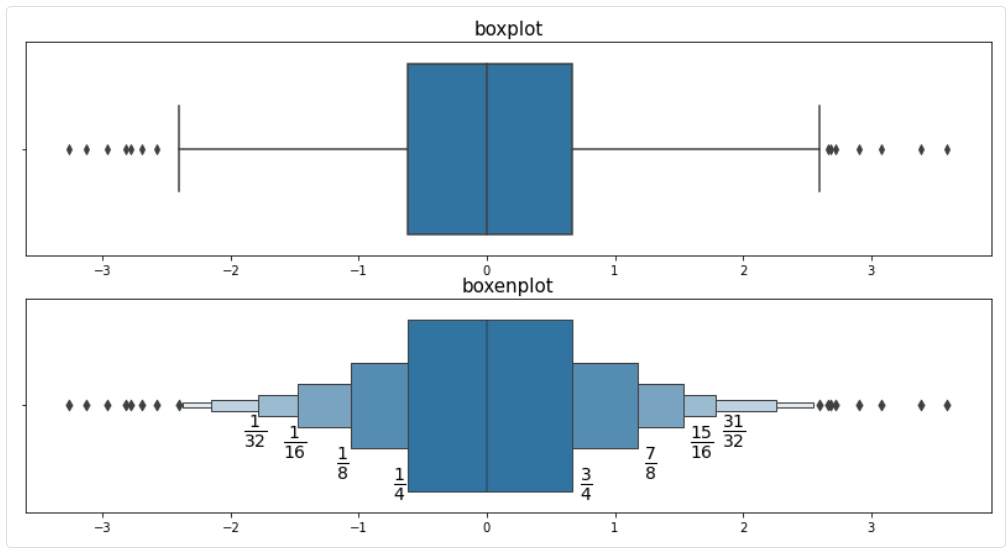  
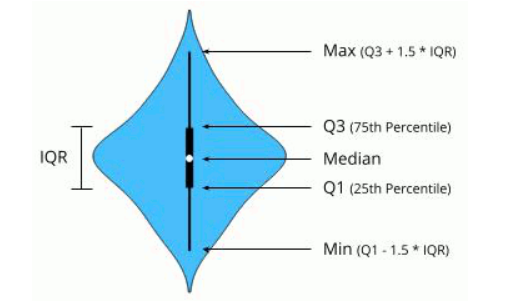  


_Додаткові (необов'язкові) параметри:_  
hue - дозволяє отримати різні кольори для кожного значення заданої категоріальної змінної  
col, row - дозволяє отримати різні графіки для кожного значення заданої категоріальної змінної  
height - висота графіка  
aspect - співвідношення сторін, так що співвідношення * висота дає ширину

In [ ]:
sns.catplot(data=df, y='average', kind='box');

In [ ]:
sns.catplot(data=df, x='parental level of education',y='average', kind='violin');
plt.xticks(rotation=45); #налаштування підписів горизонтальної осі

In [ ]:
sns.catplot(data=df, x='gender',y='average', col='test preparation course', kind='boxen', 
            height=3.5, aspect=1);

**2. підрахунок значень в кожній категорії:**  
- kind="bar" - barplot (агрегує дані за значеннями категоріальної змінної та застосовує певну функцію (за замовчуванням середнє) до значень кількісної величини)
- kind="count" - countplot (показує кількість спостережень в кожній категорії категоріальної величини)  


_Додаткові (необов'язкові) параметри:_  
hue - дозволяє отримати різні кольори для кожного значення заданої категоріальної змінної  
col, row - дозволяє отримати різні графіки для кожного значення заданої категоріальної змінної  
height - висота графіка  
aspect - співвідношення сторін, так що співвідношення * висота дає ширину

In [ ]:
sns.catplot(data=df, x='lunch', y='reading score', hue='test preparation course', kind='bar', 
           height=3.5, aspect=1.5);

In [ ]:
sns.catplot(data=df, x='race/ethnicity', col='gender', kind='count', 
           height=3, aspect=1.5);

**3. діаграми розсіювання (категоріальна величина та кількісна величина)**  
- kind="strip" - stripplot
- kind="swarm" - swarmplot  

_Додаткові (необов'язкові) параметри:_  
hue - дозволяє отримати різні кольори для кожного значення заданої категоріальної змінної  
col, row - дозволяє отримати різні графіки для кожного значення заданої категоріальної змінної  
height - висота графіка  
aspect - співвідношення сторін, так що співвідношення * висота дає ширину

In [ ]:
sns.catplot(data=df, x='race/ethnicity', y='math score', col='gender', kind='strip', 
           height=3, aspect=1.5);

In [ ]:
sns.catplot(data=df, x='race/ethnicity', y='math score', col='gender', kind='swarm', 
           height=3, aspect=1.5);

### 5. Теплова карта (heatmap)  
Теплова карта представляє собою графічне зображення кореляційної матриці  
**sns.heatmap(df.corr())**  
- метод df.corr() розраховує кореляційну матрицю  
- додатковий параметр annot=True виводить значення парних коефіцієнтів кореляції на тепловій карті

In [ ]:
sns.heatmap(df.corr(), annot=True);

## Додатково    
**sns.pairplot()** показує взаємозв'язок між усіма парами змінних, по діагоналі - розподіл кожної змінної  
**sns.pairplot(data, kind='scatter' або 'reg')**  

_Додаткові (необов'язкові) параметри:_  
hue - дозволяє отримати різні кольори для кожного значення заданої категоріальної змінної  
height - висота графіка  
aspect - співвідношення сторін, так що співвідношення * висота дає ширину

In [ ]:
sns.pairplot(data=df, height=5, aspect=1, hue='gender', kind='reg');